In [20]:
# Reading files 
import numpy as np
import pandas as pd

PATHJH = 'C:/Users/abarr/Documents/GitHub/PoC-NY-data/output/JHopkins/'
PATHNYT = 'C:/Users/abarr/Documents/GitHub/PoC-NY-data/output/NYTimes/'
PATHNYC = 'C:/Users/abarr/Documents/GitHub/PoC-NY-data/output/NYChealth/'

JH = pd.read_csv(PATHJH + 'JHraw_epidemiology_NY_std.csv')
NYT = pd.read_csv(PATHNYT + 'NYTraw_epidemiology_NY_std.csv')
nyc_hboro = pd.read_csv(PATHNYC + 'NYChealthraw_epidemiology_BOROUGT_std.csv')
nyc_h = pd.read_csv(PATHNYC + 'NYChealthraw_epidemiology_NYC_std.csv')
PreUpdate_nyc_h = pd.read_csv(PATHNYC + 'PreUpdate_NYChealthraw_epidemiology_NYC_std.csv')


In [21]:
print('JH')
display(JH.head())
print('NYT')
display(NYT.head())
print('nyc_h')
display(nyc_h)
print('PreUpdate_nyc_h')
display(PreUpdate_nyc_h)

## from nyc_health data, we are going to calculate the cumulative data which will be compared with jh data and nyt data. 

JH


,date,fips,county,cases,deaths,active,recovered
0,2020-03-22,36001,Albany,123,0,123,0
1,2020-03-22,36003,Allegany,2,0,2,0
2,2020-03-22,36005,Bronx,0,0,0,0
3,2020-03-22,36007,Broome,3,1,2,0
4,2020-03-22,36009,Cattaraugus,0,0,0,0


NYT


,date,fips,county,cases,deaths
0,2020-03-01,36001,Albany,0,0
1,2020-03-01,36003,Allegany,0,0
2,2020-03-01,36007,Broome,0,0
3,2020-03-01,36009,Cattaraugus,0,0
4,2020-03-01,36011,Cayuga,0,0


nyc_h


,date,fips,county,daily_cases,daily_hospitalized,daily_deaths,daily_cases_avg,daily_hospitalized_avg,daily_deaths_avg
0,2020-02-29,99999,New York City,1,0,0,0,0,0
1,2020-03-01,99999,New York City,0,0,0,0,0,0
2,2020-03-02,99999,New York City,0,0,0,0,0,0
3,2020-03-03,99999,New York City,1,1,0,0,0,0
4,2020-03-04,99999,New York City,5,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
269,2020-11-24,99999,New York City,1745,104,15,1590,108,10
270,2020-11-25,99999,New York City,1973,102,10,1633,108,10
271,2020-11-26,99999,New York City,653,143,5,1473,113,9
272,2020-11-27,99999,New York City,1553,127,7,1452,115,9


PreUpdate_nyc_h


,date,fips,county,daily_cases,daily_hospitalized,daily_deaths,daily_cases_avg,daily_hospitalized_avg,daily_deaths_avg
0,2020-02-29,99999,New York City,1,0,0,0,0,0
1,2020-03-01,99999,New York City,0,0,0,0,0,0
2,2020-03-02,99999,New York City,0,0,0,0,0,0
3,2020-03-03,99999,New York City,1,1,0,0,0,0
4,2020-03-04,99999,New York City,5,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
256,2020-11-11,99999,New York City,1336,77,7,1121,62,8
257,2020-11-12,99999,New York City,1270,59,12,1148,61,8
258,2020-11-13,99999,New York City,1147,62,5,1171,62,8
259,2020-11-14,99999,New York City,649,45,5,1152,61,7


In [22]:
vector_NYC=['Bronx','Kings','New York','Queens','Richmond','New York City']
five_NYC_JH = pd.DataFrame(columns=['date','fips','county','cases','deaths','active','recovered'])
## five_NYC_JH contains daily counts of cases confirmed, deaths, active and recovered of the citywide 
## of new york from 2020-03-22 to the last report.
k = 0
for i in range(0,len(vector_NYC)):
    OneCounty = JH[JH.county==vector_NYC[i]]
    if k == 0 :
        five_NYC_JH = OneCounty.copy()
    else:
        five_NYC_JH = pd.concat([five_NYC_JH,OneCounty], axis=0)
    
    k += 1

In [23]:
import datetime
import pandas as pd
## file five_NYC_NYT contains daily counts of cases confirmed and deaths of the citywide 
## of new york from 2020-03-22 to the last report.
aux = NYT[NYT.county=='New York City'].copy()
aux['date'] = pd.to_datetime(aux['date']).dt.strftime('%Y-%m-%d') # changing the format date
aux['date'] = pd.to_datetime(aux['date']) # Transform date from str to datetime 
aux.index = aux['date']
five_NYC_NYT = aux.loc[datetime.datetime(2020,3,22):]
five_NYC_NYT.index.name = None
five_NYC_NYT = five_NYC_NYT.reset_index(drop=True)

In [24]:
nyc_jh = five_NYC_JH[five_NYC_JH.county=='New York City'][['date','cases']].reset_index(drop=True)
nyc_nyt = five_NYC_NYT[['date','cases']]
print('nyc_jh data')
display(nyc_jh)
print('nyc_nyt data')
display(nyc_nyt)
## file nyc_h contains daily cases confirmed, hospitalized and deaths of the citywide of New York from 
## 2020-02-29 to 2020-11-14. To compare the files jh, nyt and nychealth we'll considerer the cases 
## confirmed only
nyc_h['date'] = pd.to_datetime(nyc_h['date'])
nyc_h.index = nyc_h['date']
## Calculate cumulative data from nyc_health
aux_nyc_health = nyc_h[['date','daily_cases']].copy() ## nyc_health daily data
aux_nyc_health = aux_nyc_health.reset_index(drop=True) 
aux_nyc_health['cases']=aux_nyc_health['daily_cases'].cumsum()
nyc_health_cumulative=aux_nyc_health[['date','cases']].copy()
nyc_health_cumulative.index=nyc_health_cumulative['date']
nyc_health_cumulative = nyc_health_cumulative.loc[datetime.datetime(2020,3,22):]
nyc_health_cumulative = nyc_health_cumulative.reset_index(drop=True)
print('nyc health cumulative data')
display(nyc_health_cumulative)
### Reading the file of nychealth with previous actualization 
PreUpdate_nyc_h['date'] = pd.to_datetime(PreUpdate_nyc_h['date'])
Paux_nyc_health = PreUpdate_nyc_h[['date','daily_cases']].copy()
Paux_nyc_health = Paux_nyc_health.reset_index(drop=True)
Paux_nyc_health['cases']=Paux_nyc_health['daily_cases'].cumsum()
Pnyc_health_cumulative=Paux_nyc_health[['date','cases']].copy()
Pnyc_health_cumulative.index=Pnyc_health_cumulative['date']
Pnyc_health_cumulative = Pnyc_health_cumulative.loc[datetime.datetime(2020,3,22):]
Pnyc_health_cumulative = Pnyc_health_cumulative.reset_index(drop=True)
print('Previous update of the nyc health cumulative data')
display(Pnyc_health_cumulative)

nyc_jh data


,date,cases
0,2020-03-22,9654
1,2020-03-23,12305
2,2020-03-24,14904
3,2020-03-25,17856
4,2020-03-26,21873
...,...,...
238,2020-11-15,282056
239,2020-11-16,283341
240,2020-11-17,285275
241,2020-11-18,287022


nyc_nyt data


,date,cases
0,2020-03-22,9065
1,2020-03-23,12329
2,2020-03-24,14943
3,2020-03-25,20061
4,2020-03-26,23182
...,...,...
238,2020-11-15,286785
239,2020-11-16,288078
240,2020-11-17,290018
241,2020-11-18,291753


nyc health cumulative data


,date,cases
0,2020-03-22,23452
1,2020-03-23,27022
2,2020-03-24,31523
3,2020-03-25,36397
4,2020-03-26,41444
...,...,...
247,2020-11-24,289358
248,2020-11-25,291331
249,2020-11-26,291984
250,2020-11-27,293537


Previous update of the nyc health cumulative data


,date,cases
0,2020-03-22,23462
1,2020-03-23,27032
2,2020-03-24,31535
3,2020-03-25,36409
4,2020-03-26,41457
...,...,...
234,2020-11-11,269538
235,2020-11-12,270808
236,2020-11-13,271955
237,2020-11-14,272604


### 1) Comparative graphs between the jh, ny and nychealth source.

NOTE: The name 'Pnyc_health_cumulative' refers to pre-update nyc_health data.

In [25]:
from datetime import datetime, timedelta 
## We make one dataset with all data that we want to graph. nyc_jh / nyc_nyt / nyc_health_cumulative 
## / Pnyc_health_cumulative
inicio = datetime(2020,3,22)
fin    = datetime(2020,11,19)
lista_fechas = [inicio + timedelta(days=d) for d in range((fin - inicio).days + 1)]

dataset=pd.DataFrame()
dataset['date']=lista_fechas
dataset['nyc_jh']=nyc_jh['cases']
dataset['nyc_nyt']=nyc_nyt['cases']
dataset['nyc_health_cumulative']= nyc_health_cumulative['cases']
dataset['nyc_health_cumulative']= nyc_health_cumulative['cases']
dataset['Pnyc_health_cumulative']= Pnyc_health_cumulative['cases']
dataset.index=dataset['date']
display(dataset)

,date,nyc_jh,nyc_nyt,nyc_health_cumulative,Pnyc_health_cumulative
date,,,,,
2020-03-22,2020-03-22,9654,9065,23452,23462.0
2020-03-23,2020-03-23,12305,12329,27022,27032.0
2020-03-24,2020-03-24,14904,14943,31523,31535.0
2020-03-25,2020-03-25,17856,20061,36397,36409.0
2020-03-26,2020-03-26,21873,23182,41444,41457.0
...,...,...,...,...,...
2020-11-15,2020-11-15,282056,286785,274806,273080.0
2020-11-16,2020-11-16,283341,288078,276574,NaN
2020-11-17,2020-11-17,285275,290018,278230,NaN


,date,nyc_jh,nyc_nyt,nyc_health_cumulative,Pnyc_health_cumulative
date,,,,,
2020-03-22,2020-03-22,9654,9065,23452,23462.0
2020-03-23,2020-03-23,12305,12329,27022,27032.0
2020-03-24,2020-03-24,14904,14943,31523,31535.0
2020-03-25,2020-03-25,17856,20061,36397,36409.0
2020-03-26,2020-03-26,21873,23182,41444,41457.0
...,...,...,...,...,...
2020-11-15,2020-11-15,282056,286785,274806,273080.0
2020-11-16,2020-11-16,283341,288078,276574,NaN
2020-11-17,2020-11-17,285275,290018,278230,NaN


From 2020-03-22 to 2020-11-15


Text(0.5, 1.0, 'Porcentage-comparison between last update nyc_health data and pre-update nyc_health data')

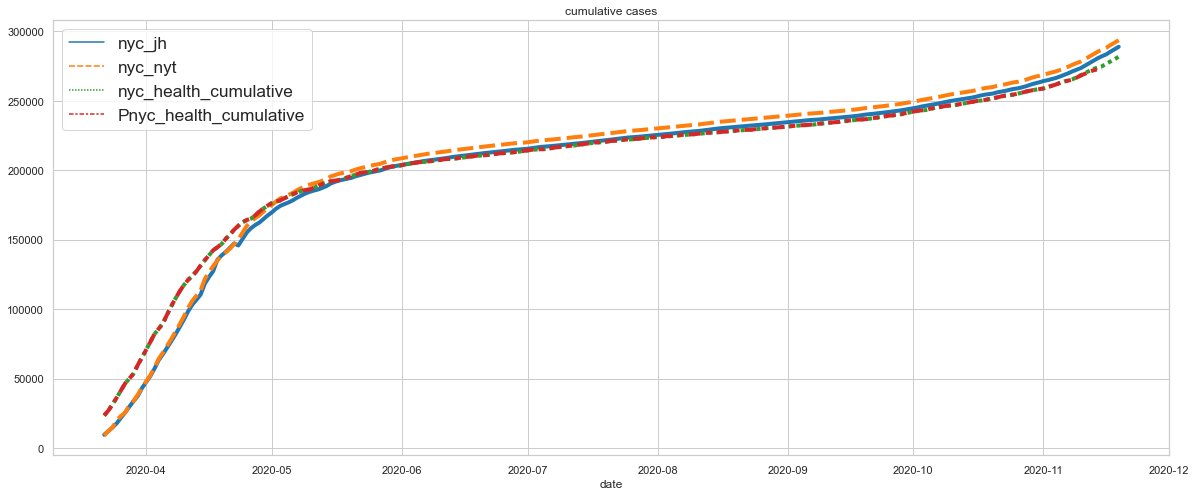

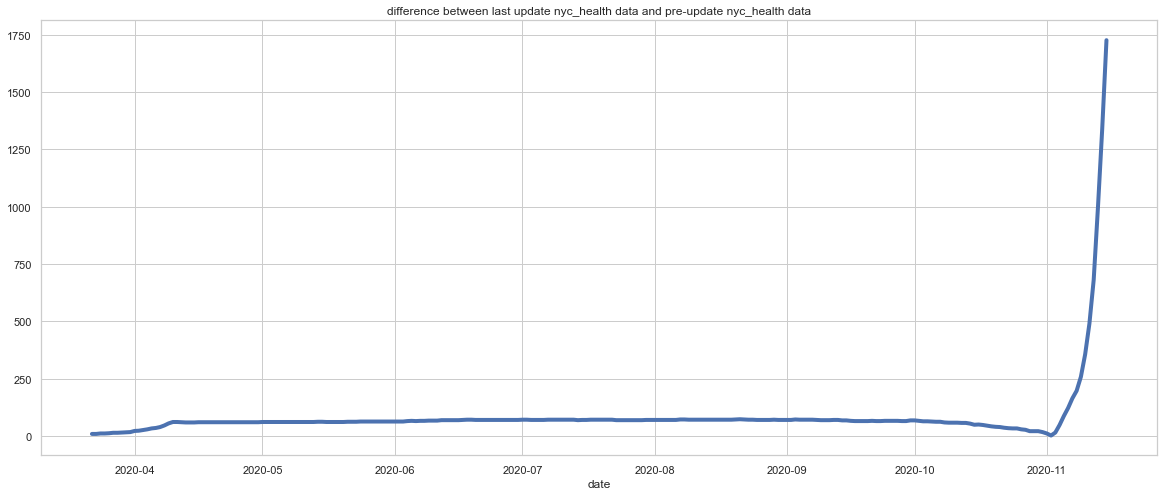

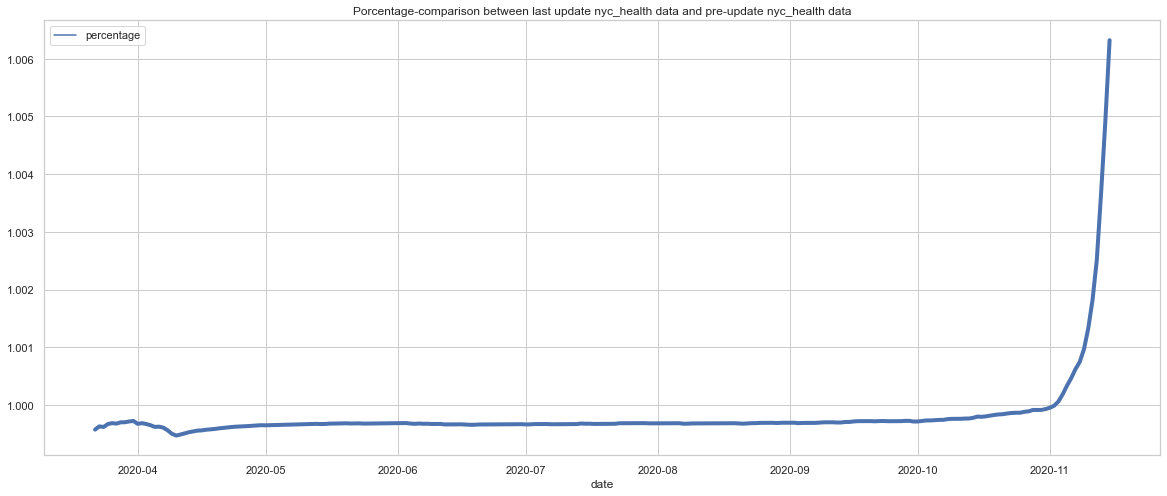

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.lineplot(data=dataset, palette="tab10", linewidth=4)
plt.legend(fontsize='x-large')
plt.title("cumulative cases")
display(dataset)

dataset_m=dataset.copy()
dataset_m = dataset_m.fillna(0)
todrop=dataset_m[dataset_m['Pnyc_health_cumulative']==0]
dataset_m.drop(todrop.index, inplace= True)

plt.figure(figsize=(20, 8))
print('From 2020-03-22 to 2020-11-15')
aux=abs(dataset_m['nyc_health_cumulative']-dataset_m['Pnyc_health_cumulative'])
sns.lineplot(data=aux, linewidth=4)
plt.title("difference between last update nyc_health data and pre-update nyc_health data")


dataset_comp=pd.DataFrame((dataset_m['nyc_health_cumulative']/dataset_m['Pnyc_health_cumulative']), columns=['percentage'])
dataset_comp.index=dataset_m['date']
#display(dataset_comp)

plt.figure(figsize=(20, 8))
sns.lineplot(data=dataset_comp, linewidth=4)
plt.title("Porcentage-comparison between last update nyc_health data and pre-update nyc_health data")

### nyc_h versus nyc_hboro

In [177]:
nyc_hboro.columns

Index(['date', 'fips', 'county', 'daily_cases', 'daily_hospitalized',
       'daily_deaths', 'daily_cases_avg', 'daily_hospitalized_avg',
       'daily_deaths_avg'],
      dtype='object')

date,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,...,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28
daily_cnt,,,,,,,,,,,,,,,,,,,,,
daily_cases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
daily_hospitalized,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
daily_deaths,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
daily_cases_avg,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,1,0,0,1
daily_hospitalized_avg,0,0,0,0,0,0,1,0,1,2,...,0,0,0,0,1,1,0,0,1,1
daily_deaths_avg,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,1,0,1


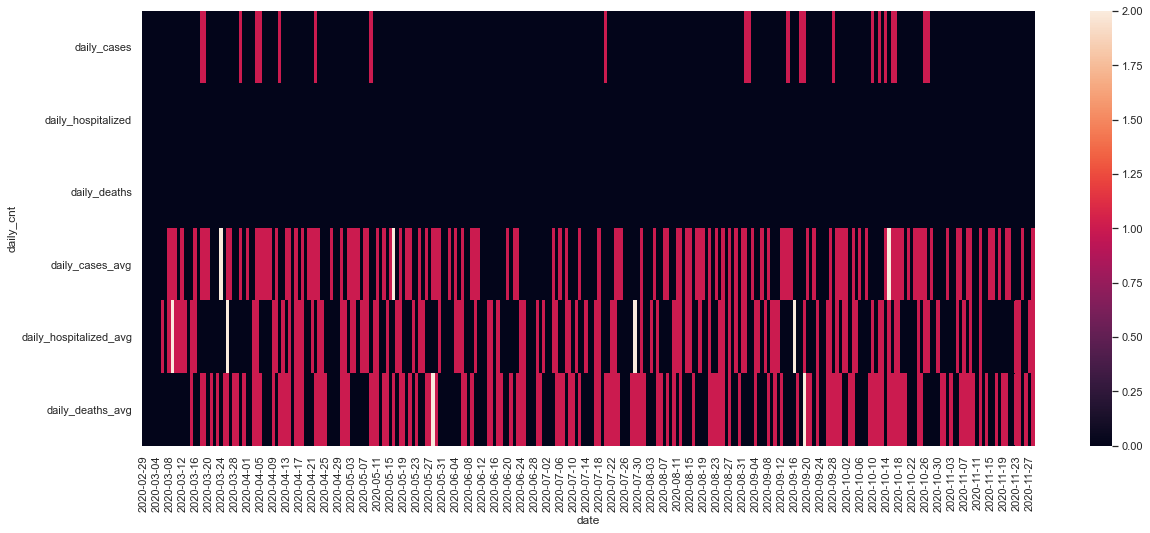

In [27]:
nyc_from_boro=pd.DataFrame(columns=['date','fips','county','daily_cases','daily_hospitalized','daily_deaths'
                                    ,'daily_cases_avg','daily_hospitalized_avg','daily_deaths_avg'])
grupos=nyc_hboro.groupby('date')
k=0
for date, data in grupos:
    nyc_from_boro.loc[k,'date']=np.unique(data['date'])[0]
    nyc_from_boro.loc[k,'fips']=9999
    nyc_from_boro.loc[k,'county']='New York City'
    nyc_from_boro.loc[k,'daily_cases']=data['daily_cases'].sum()
    nyc_from_boro.loc[k,'daily_hospitalized']=data['daily_hospitalized'].sum()
    nyc_from_boro.loc[k,'daily_deaths']=data['daily_deaths'].sum()
    nyc_from_boro.loc[k,'daily_cases_avg']=data['daily_cases_avg'].sum()
    nyc_from_boro.loc[k,'daily_hospitalized_avg']=data['daily_hospitalized_avg'].sum()
    nyc_from_boro.loc[k,'daily_deaths_avg']=data['daily_deaths_avg'].sum()
    k +=1

diff_matrix=pd.DataFrame(index=nyc_h['date'], columns=['daily_cases','daily_hospitalized','daily_deaths'
                                                      ,'daily_cases_avg','daily_hospitalized_avg','daily_deaths_avg'])

diff_matrix['daily_cases']=abs(nyc_from_boro['daily_cases'].values-nyc_h['daily_cases'].values)
diff_matrix['daily_hospitalized']=abs(nyc_from_boro['daily_hospitalized'].values-nyc_h['daily_hospitalized'].values)
diff_matrix['daily_deaths']=abs(nyc_from_boro['daily_deaths'].values-nyc_h['daily_deaths'].values)
diff_matrix['daily_cases_avg']=abs(nyc_from_boro['daily_cases_avg'].values-nyc_h['daily_cases_avg'].values)
diff_matrix['daily_hospitalized_avg']=abs(nyc_from_boro['daily_hospitalized_avg'].values-nyc_h['daily_hospitalized_avg'].values)
diff_matrix['daily_deaths_avg']=abs(nyc_from_boro['daily_deaths_avg'].values-nyc_h['daily_deaths_avg'].values)

diff_matrix=diff_matrix.T
diff_matrix.index.name='daily_cnt'
diff_matrix.columns=pd.to_datetime(diff_matrix.columns).strftime('%Y-%m-%d')
diff_matrix = diff_matrix.fillna(0)
#breakpoint()
#display(nyc_from_boro)
#display(nyc_h)
display(diff_matrix)
plt.figure(figsize=(20, 8))
p = sns.heatmap(diff_matrix)


### Hybridized data (nych-jh)

In [28]:
nychealth_by_boro=nyc_hboro[['date', 'fips', 'county', 'daily_cases']].copy()
vector=np.unique(nyc_hboro['county'].values)

for i in range(0,len(vector)):
    aux=nychealth_by_boro[nychealth_by_boro.county==vector[i]].copy()
    inds=nychealth_by_boro.loc[nychealth_by_boro.county==vector[i]].copy()
    nychealth_by_boro.loc[inds.index,'cases']=aux['daily_cases'].cumsum()

nychealth_by_boro=nychealth_by_boro.drop(['daily_cases'], axis=1)

print('nyc by borought from nychealth data')
display(nychealth_by_boro[nychealth_by_boro.county=='Bronx'])

### we create a table of data disaggregated by borough from the JH data
#five_NYC_JH = pd.concat([five_NYC_JH,OneCounty], axis=0)

nycJH_by_boro=pd.DataFrame()
k=0
for i in range(0,len(vector)):
    boro=JH[JH.county==vector[i]][['date','fips','county','cases']]
    if k==0:
        nycJH_by_boro=boro
    else:
        nycJH_by_boro=pd.concat([nycJH_by_boro,boro],axis=0)
    k +=1
print('nyc by borought from JH data')
display(nycJH_by_boro[nycJH_by_boro.county=='Bronx'])

nyc by borought from nychealth data


,date,fips,county,cases
0,2020-02-29,36005,Bronx,0.0
1,2020-03-01,36005,Bronx,0.0
2,2020-03-02,36005,Bronx,0.0
3,2020-03-03,36005,Bronx,0.0
4,2020-03-04,36005,Bronx,0.0
...,...,...,...,...
269,2020-11-24,36005,Bronx,61329.0
270,2020-11-25,36005,Bronx,61681.0
271,2020-11-26,36005,Bronx,61791.0
272,2020-11-27,36005,Bronx,62021.0


nyc by borought from JH data


,date,fips,county,cases
2,2020-03-22,36005,Bronx,0
66,2020-03-23,36005,Bronx,0
130,2020-03-24,36005,Bronx,0
194,2020-03-25,36005,Bronx,0
258,2020-03-26,36005,Bronx,0
...,...,...,...,...
15234,2020-11-15,36005,Bronx,58712
15298,2020-11-16,36005,Bronx,58905
15362,2020-11-17,36005,Bronx,59265
15426,2020-11-18,36005,Bronx,59548


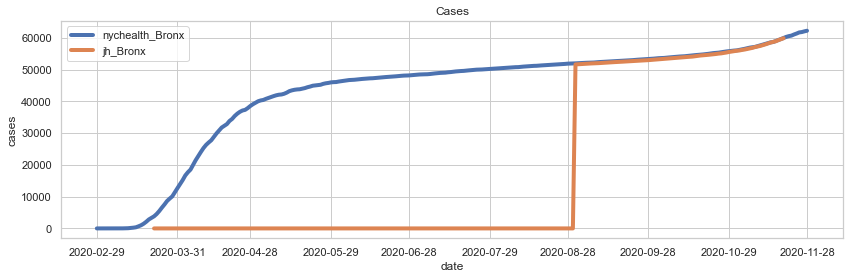

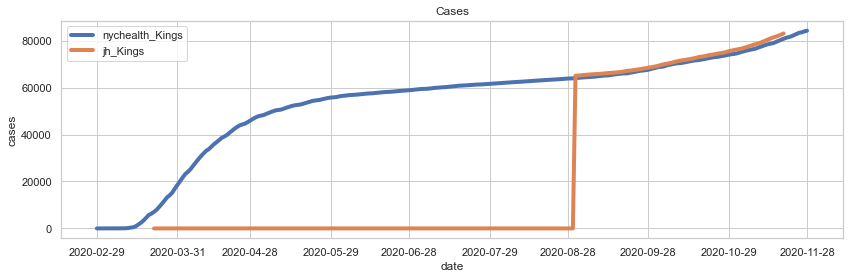

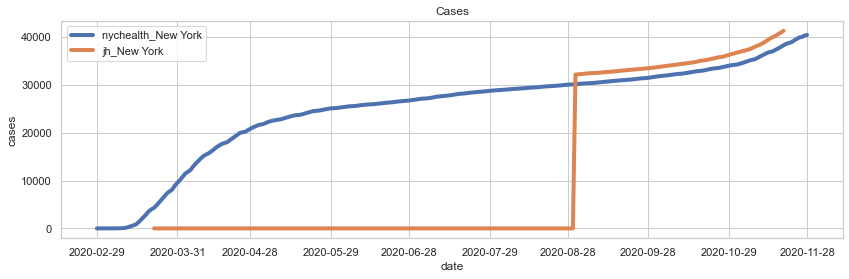

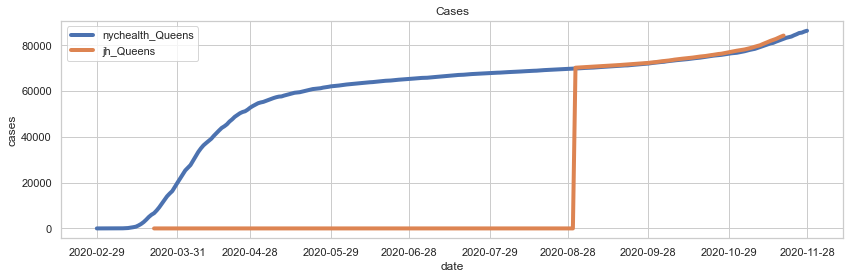

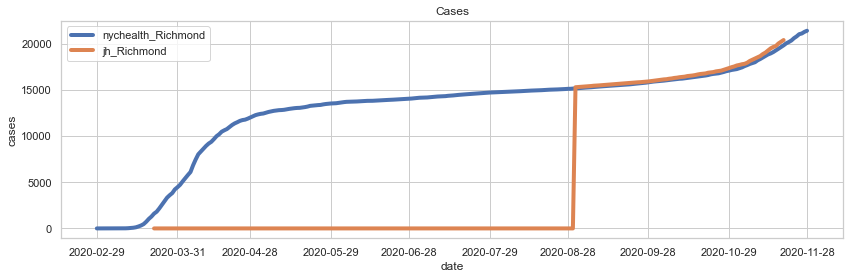

In [29]:
from matplotlib.dates import MonthLocator, DateFormatter
sns.set_theme(style="whitegrid")

nycJH_by_boro.index=nycJH_by_boro['date']
nycJH_by_boro=nycJH_by_boro.drop(['date'], axis=1)

nychealth_by_boro.index=nychealth_by_boro['date']
nychealth_by_boro=nychealth_by_boro.drop(['date'], axis=1)

counties=np.unique(nychealth_by_boro['county'])

for i in range(0,len(counties)):
    nychealthboro = nychealth_by_boro[nychealth_by_boro.county==counties[i]]['cases']
    nycjhboro = nycJH_by_boro[nycJH_by_boro.county==counties[i]]['cases']
    
    sns.set_theme(style="whitegrid")
    fig = plt.figure(figsize=[14, 4])
    ax = fig.add_subplot(111)
    sns.lineplot(data=nychealthboro, palette="tab10" ,linewidth=4, 
                 label='nychealth_' + counties[i])
    sns.lineplot(data=nycjhboro, palette="tab10", linewidth=4, 
                 label='jh_' + counties[i])
    ax.xaxis.set_major_locator(MonthLocator())
    #ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
    plt.title('Cases')
    plt.legend()
    plt.show()

,Bronx,Kings,New York,Queens,Richmond
2020-02-29,0.0,0.0,1.0,0.0,0.0
2020-03-01,0.0,0.0,1.0,0.0,0.0
2020-03-02,0.0,0.0,1.0,0.0,0.0
2020-03-03,0.0,0.0,1.0,1.0,0.0
2020-03-04,0.0,1.0,3.0,3.0,0.0
...,...,...,...,...,...
2020-11-15,58712.0,81371.0,39975.0,82356.0,19642.0
2020-11-16,58905.0,81686.0,40226.0,82775.0,19749.0
2020-11-17,59265.0,82090.0,40587.0,83311.0,20022.0
2020-11-18,59548.0,82543.0,40908.0,83809.0,20214.0


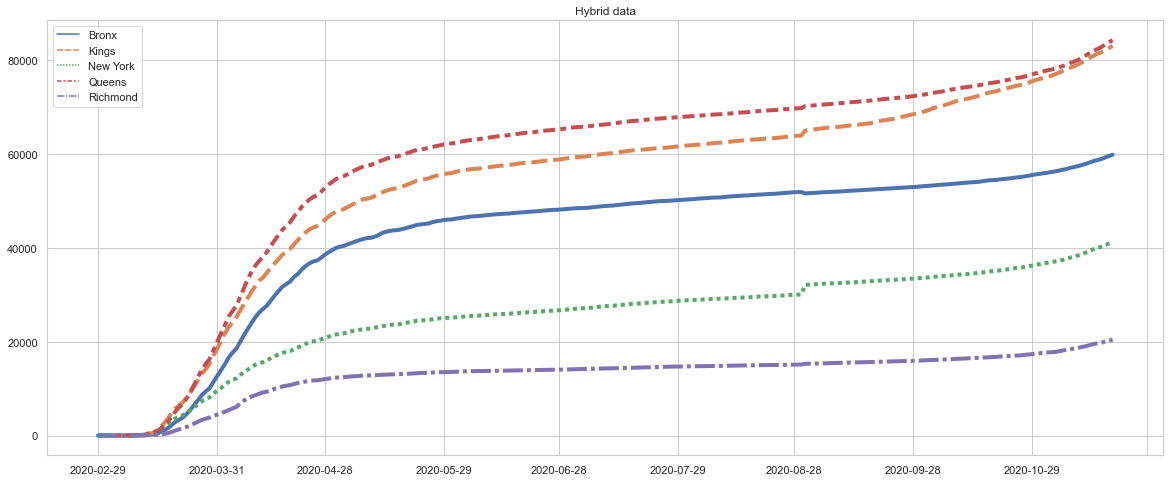

In [32]:
import datetime 
jh_dates=[]
for i in range(0,len(counties)):
    jh_dates.append(nycJH_by_boro[(nycJH_by_boro.county==counties[i]) & 
                                  (nycJH_by_boro.cases == 0)].index[-1])

## hybrid data
hybrid_data=pd.DataFrame()
day=datetime.datetime(pd.to_datetime(jh_dates[0]).year,
                      pd.to_datetime(jh_dates[0]).month,
                      pd.to_datetime(jh_dates[0]).day+1).strftime('%Y-%m-%d')
k = 0
for i in range(0,len(counties)):
    nychealthboro = nychealth_by_boro[nychealth_by_boro.county==counties[i]].loc[nychealth_by_boro.index[0]:jh_dates[0]]
    nycjhboro = nycJH_by_boro[nycJH_by_boro.county==counties[i]].loc[day:]
    hybrid = pd.concat([nychealthboro,nycjhboro], axis=0)
    
    if k==0:
        hybrid_data=hybrid.copy()
    else:
        hybrid_data=pd.concat([hybrid_data,hybrid], axis=0)
    
    k=k+1
   
dataset_hybrid=pd.DataFrame(index=np.unique(hybrid_data.index), columns=counties)
for i in range(0,5):
    dataset_hybrid[counties[i]]=hybrid_data[hybrid_data.county==counties[i]]['cases'].values

display(dataset_hybrid)
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
sns.lineplot(data=dataset_hybrid, linewidth=4)
ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.title("Hybrid data")
plt.show()

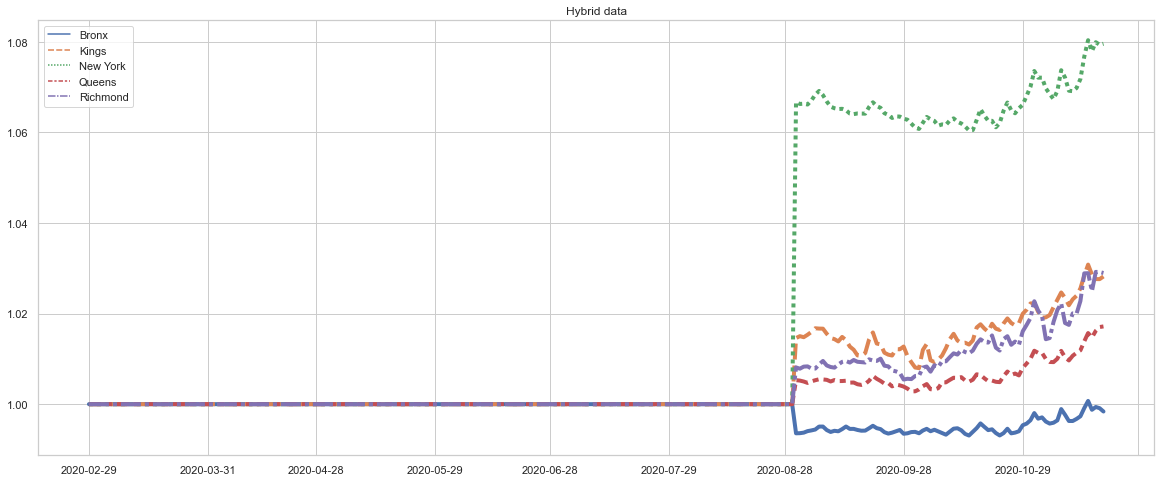

,Bronx,Kings,New York,Queens,Richmond
2020-02-29,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-01,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-03,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-04,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...
2020-11-15,1.000716,1.030809,1.080347,1.015700,1.028916
2020-11-16,0.998762,1.028610,1.077925,1.014723,1.024964
2020-11-17,0.999376,1.027615,1.079901,1.016186,1.029197
2020-11-18,0.999111,1.027600,1.079338,1.017025,1.029174


In [33]:
dataset_health=pd.DataFrame(index=np.unique(hybrid_data.index), columns=counties)
comparison=pd.DataFrame(index=np.unique(hybrid_data.index), columns=counties)
for i in range(0,5):
    dataset_health[counties[i]]= nychealth_by_boro[nychealth_by_boro.county==counties[i]].loc['2020-02-29':'2020-11-19',
                                                                                              'cases'].values
    comparison[counties[i]] = dataset_hybrid[counties[i]]/dataset_health[counties[i]]
    comparison[counties[i]]=comparison[counties[i]].fillna(1)
  
#### Comparison : JH (hybrid) / nychealth

sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
sns.lineplot(data=comparison, linewidth=4)
ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
plt.title("Hybrid data")
plt.show()


#display(dataset_health)
#display(dataset_hybrid)
display(comparison)



### Difference matrix between jh and nyt data.
 Counties level

In [10]:
display(JH[JH.county=='Albany'])

,date,fips,county,cases,deaths,active,recovered
0,2020-03-22,36001,Albany,123,0,123,0
64,2020-03-23,36001,Albany,127,0,127,0
128,2020-03-24,36001,Albany,146,0,146,0
192,2020-03-25,36001,Albany,152,0,152,0
256,2020-03-26,36001,Albany,171,0,171,0
...,...,...,...,...,...,...,...
15232,2020-11-15,36001,Albany,4529,140,4389,3610
15296,2020-11-16,36001,Albany,4572,140,4432,3631
15360,2020-11-17,36001,Albany,4653,147,4506,3655
15424,2020-11-18,36001,Albany,4730,147,4583,3698


In [27]:
#display(JH)
NYT.county.replace(['Unknown'],['Unassigned'], inplace=True)
## those counties that are in JH but not in NYT.
counties_not=np.array(list(set(JH['county'])-set(NYT['county'].values)))
counties=np.unique(NYT['county'].values)
inicio=datetime(2020,3,22)
fin=datetime(2020,11,19)
dates=[inicio + timedelta(days=d) for d in range((fin - inicio).days + 1)]
diff_cases=pd.DataFrame(index=dates, columns=counties)
diff_deaths=pd.DataFrame(index=dates, columns=counties)
equal_date_nyt=pd.DataFrame()
group_county=NYT.groupby('county')
k=0
for cty, data in group_county:
    data=data.reset_index()
    data=data.drop(['index'], axis=1)
    from_=data[data.date=='2020-03-22'].index[0]
    diff_cases[cty]=abs(JH[JH.county==cty]['cases'].values-data[from_:]['cases'].values)
    diff_deaths[cty]=abs(JH[JH.county==cty]['deaths'].values-data[from_:]['deaths'].values)
    if k==0:
        equal_date_nyt=data[from_:]
    else:
        equal_date_nyt=pd.concat([equal_date_nyt,data[from_:]],axis=0)
    
    k += 1


display(diff_cases)
display(diff_deaths)

,Albany,Allegany,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,Columbia,...,Tioga,Tompkins,Ulster,Unassigned,Warren,Washington,Wayne,Westchester,Wyoming,Yates
2020-03-22,0,0,0,0,0,0,0,1,0,12,...,0,2,8,23,0,0,0,0,0,0
2020-03-23,0,0,4,0,2,0,2,1,2,7,...,0,0,17,107,1,2,3,0,2,0
2020-03-24,0,0,0,0,0,2,2,0,2,7,...,0,0,12,0,0,0,0,0,0,0
2020-03-25,0,0,0,0,0,1,2,0,0,7,...,0,2,0,0,0,0,0,0,0,0
2020-03-26,0,0,0,0,0,1,0,0,0,11,...,0,1,11,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2020-11-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2020-11-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2020-11-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,Albany,Allegany,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,Columbia,...,Tioga,Tompkins,Ulster,Unassigned,Warren,Washington,Wayne,Westchester,Wyoming,Yates
2020-03-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,38,0,0,0,0,0,0
2020-03-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,36,0,0,0,0,1,0
2020-03-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,39,0,0,0,5,1,0
2020-03-25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,5,1,0
2020-03-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,45,0,0,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-15,5,0,0,0,0,10,0,2,0,0,...,0,0,11,15,5,0,0,0,0,1
2020-11-16,5,0,0,0,0,10,0,2,0,0,...,0,0,11,22,5,0,0,0,0,1
2020-11-17,12,0,0,0,0,11,2,3,0,0,...,0,0,11,27,5,0,2,0,0,1
2020-11-18,12,0,0,0,0,10,1,3,0,0,...,0,0,10,33,5,0,2,0,0,1
